# **Storms Are Getting Angry: How Rising Temperatures Fuel Stronger Hurricanes**

### **Introduction**
Climate change is one of the most pressing challenges of our time, and its impact on extreme weather events is undeniable. Hurricanes, especially the most intense ones (Category 4–5), have shown an increasing trend in frequency and severity over recent decades. This story explores the relationship between rising global temperatures and the occurrence of major hurricanes in the Atlantic Ocean.

---


### **Abstract**
This story analyzes historical global temperature anomalies and Atlantic hurricane data from 1970 to 2024 to illustrate how warming Earth correlates with stronger storms. Using Python-based visualizations, the following are presented:
- A heatmap showing hurricane intensity over time.
- Line charts for temperature trends and hurricane counts.
- A dual-axis chart highlighting the correlation between temperature rise and hurricane intensity.
- A scatter plot with a regression line

---

### **Goal of the Story**
Does an increase in Earth's temperature correlate with greater frequency and intensity of hurricanes in the Atlantic Ocean?

---

### **Data Sources**
- **Global Temperature Data**: NASA Earth Science Indicators  
  https://science.nasa.gov/earth/explore/earth-indicators/global-temperature/
- **Atlantic Hurricane Data**: NOAA National Hurricane Center  
  https://www.nhc.noaa.gov/climo/images/AtlanticStormTotalsTable.pdf

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Load data
temp_df = pd.read_csv("/content/sample_data/temperature_index.csv")
storm_df = pd.read_csv("/content/sample_data/atlantic_storm_totals.csv")

# Merge datasets on Year
merged_df = pd.merge(temp_df, storm_df, on="Year")



### Heatmap of Storm Mood
A heatmap is generated where each column represents a year and the color intensity corresponds to the number of hurricanes ategory recorded in that year.
A color gradient (yellow → orange → red) is applied to indicate increasing hurricane intensity, with lighter shades representing fewer storms and darker shades representing more severe activity.
This visual emphasizes how hurricane intensity has progressed over time and highlights periods of extreme storm activity.


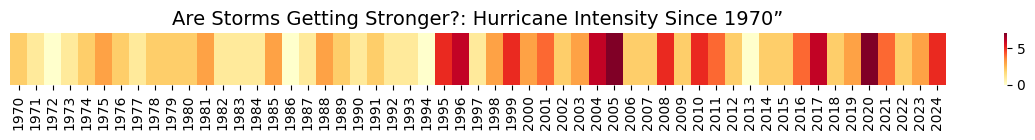

In [11]:
recent_df = merged_df[merged_df["Year"] >= 1970].copy()

# --- Heatmap Visual: Hurricane Intensity Over Time ---
recent_df["Intensity_Level"] = recent_df["Major_Hurricanes"].clip(upper=7)

plt.figure(figsize=(12, 1.5))
sns.heatmap([recent_df["Intensity_Level"]], cmap="YlOrRd", cbar=True, xticklabels=recent_df["Year"].tolist())
plt.title("Are Storms Getting Stronger?: Hurricane Intensity Since 1970”", fontsize=14)
plt.yticks([])
plt.tight_layout()
plt.show()


### Temperature Trend Visualization
A line chart is plotted to show **global temperature anomalies** from 1970 to 2024.  
This chart highlights the upward trend in Earth’s temperature.


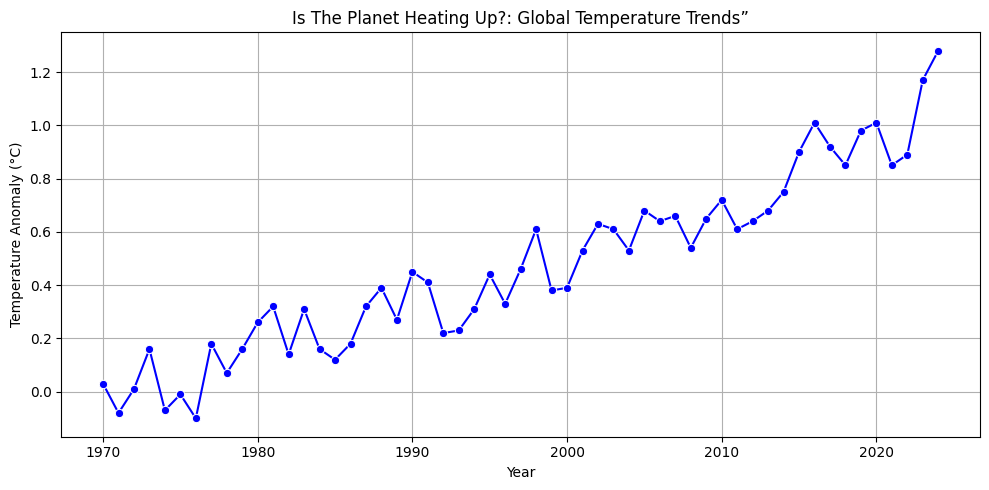

In [12]:
# --- Visual 1: Temperature anomaly over time ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=recent_df, x="Year", y="No_Smoothing", marker="o", color="blue")
plt.title("Is The Planet Heating Up?: Global Temperature Trends”")
plt.ylabel("Temperature Anomaly (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Hurricane Trend Visualization
A line chart is created to display the number of **Category 4–5 hurricanes** in the Atlantic during the same period.  
This visual shows how major hurricanes have become more frequent.


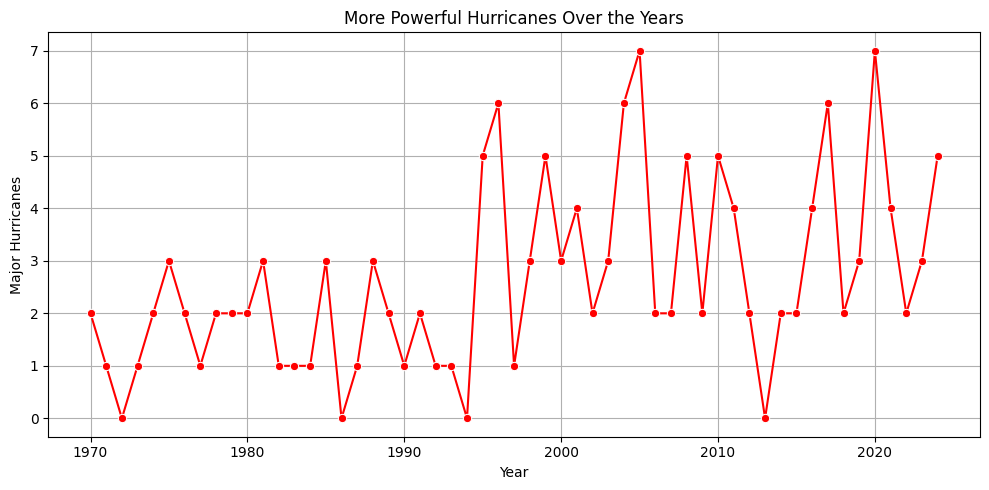

In [13]:
# --- Visual 2: Major Hurricanes over time ---
plt.figure(figsize=(10, 5))
sns.lineplot(data=recent_df, x="Year", y="Major_Hurricanes", marker="o", color="red")
plt.title("More Powerful Hurricanes Over the Years")
plt.ylabel("Major Hurricanes")
plt.grid(True)
plt.tight_layout()
plt.show()


### Dual-Axis Chart – Temperature vs. Hurricane Intensity
A combined chart is produced with two y-axes:
- The left axis represents the number of major hurricanes (shown in red).
- The right axis represents global temperature anomalies (shown in blue).

This visual illustrates the correlation between rising global temperatures and the increasing frequency of major hurricanes.  


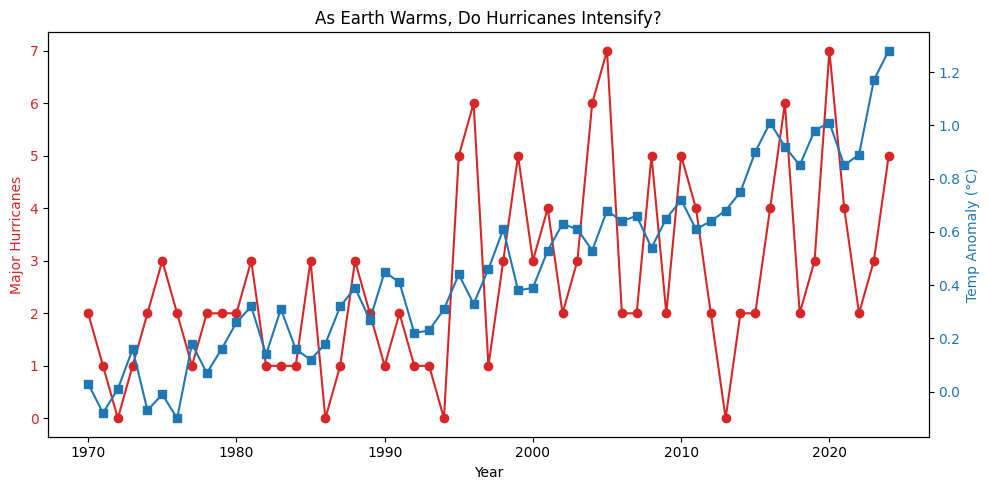

In [14]:
# --- Visual 3: Dual-axis chart ---
fig, ax1 = plt.subplots(figsize=(10, 5))
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Major Hurricanes', color=color)
ax1.plot(recent_df["Year"], recent_df["Major_Hurricanes"], color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temp Anomaly (°C)', color=color)
ax2.plot(recent_df["Year"], recent_df["No_Smoothing"], color=color, marker="s")
ax2.tick_params(axis='y', labelcolor=color)

plt.title("As Earth Warms, Do Hurricanes Intensify?")
fig.tight_layout()
plt.show()

## *“Does an increase in Earth's temperature correlate with greater frequency and intensity of hurricanes in the Atlantic Ocean?”*

Three different visualization approaches were used to attempt to answer this question:

---

### **1. Scatter Plot with Regression Line**
A scatter plot with a regression line was generated to illustrate the relationship between global temperature anomalies and the number of Category 4–5 hurricanes in the Atlantic Ocean from 1970 to 2024.  
- **X-axis**: Global Temperature Anomaly (°C)  
- **Y-axis**: Number of Major Hurricanes  
- Each point represents a year, and the regression line shows the overall trend.

Although the regression line slopes upward slightly, the data points are widely scattered, indicating that the correlation is weak.

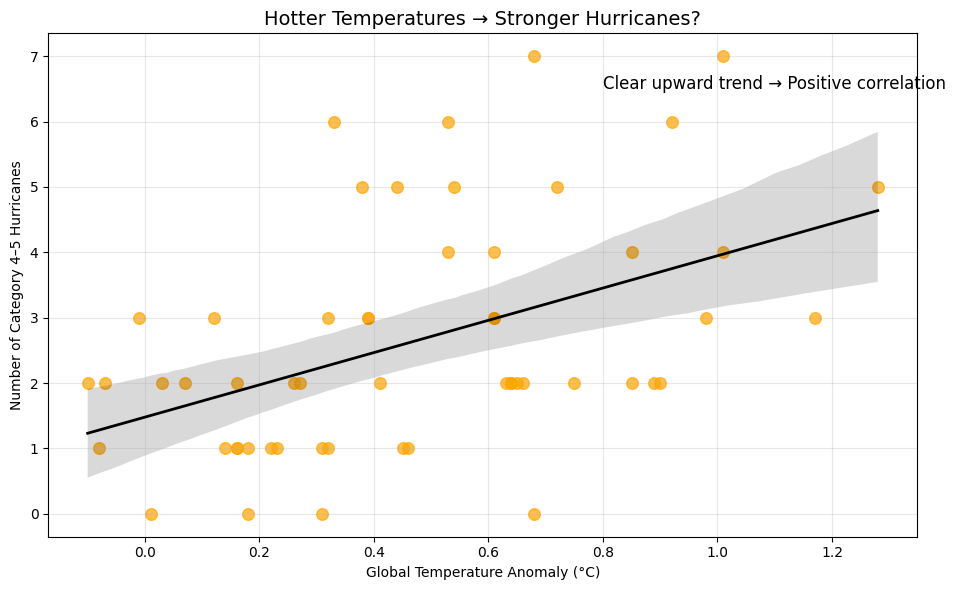

In [15]:
# --- Scatter Plot with Regression Line ---
plt.figure(figsize=(10, 6))

# Scatter plot with regression line to show correlation
sns.regplot(
    data=recent_df,
    x="No_Smoothing",  # Temperature anomaly
    y="Major_Hurricanes",  # Number of Category 4–5 hurricanes
    scatter_kws={'s': 70, 'alpha': 0.7, 'color': 'orange'},
    line_kws={'color': 'black', 'linewidth': 2}
)

# Title and labels
plt.title("Hotter Temperatures → Stronger Hurricanes?", fontsize=14)
plt.xlabel("Global Temperature Anomaly (°C)")
plt.ylabel("Number of Category 4–5 Hurricanes")
plt.grid(alpha=0.3)

# Add annotation for clarity
plt.text(0.8, 6.5, "Clear upward trend → Positive correlation", fontsize=12, color="black")

plt.tight_layout()
plt.show()

### **2. Bubble Chart with Year Progression**
A bubble chart was created to visualize temperature anomalies against hurricane counts, with bubble size representing hurricane intensity and bubble color indicating the year.  
- **X-axis**: Global Temperature Anomaly (°C)  
- **Y-axis**: Number of Major Hurricanes  
- **Bubble Size**: Hurricane count  
- **Bubble Color**: Year progression (lighter for earlier years, darker for recent years)

This chart highlights the distribution of data over time but does not reveal a strong trend between temperature and hurricane intensity.

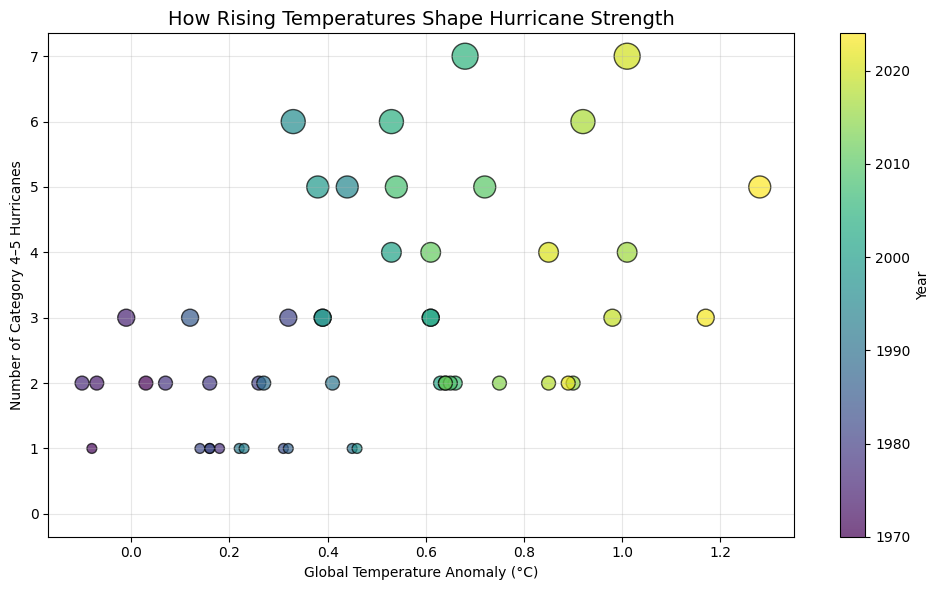

In [16]:
# Normalize year for color mapping
norm = plt.Normalize(recent_df["Year"].min(), recent_df["Year"].max())
colors = cm.viridis(norm(recent_df["Year"]))

plt.figure(figsize=(10, 6))

# Bubble chart with color mapping
scatter = plt.scatter(
    recent_df["No_Smoothing"],  # X-axis: Temperature anomaly
    recent_df["Major_Hurricanes"],  # Y-axis: Major hurricanes
    s=recent_df["Major_Hurricanes"] * 50,  # Bubble size based on hurricane count
    c=recent_df["Year"],  # Color based on year
    cmap="viridis",
    alpha=0.7,
    edgecolors="black"
)

# Add colorbar for year progression
cbar = plt.colorbar(scatter)
cbar.set_label("Year")

# Labels and title
plt.title("How Rising Temperatures Shape Hurricane Strength", fontsize=14)
plt.xlabel("Global Temperature Anomaly (°C)")
plt.ylabel("Number of Category 4–5 Hurricanes")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### **3. Boxplot by Temperature Range**
A boxplot was used to group years into three temperature ranges: **Low**, **Medium**, and **High**.  
- Each box shows the distribution of hurricane counts within a temperature range.  
- Median values were annotated, and individual data points were overlaid for clarity.

This approach provides a clearer comparison of hurricane intensity across temperature ranges, but the differences between groups remain modest, suggesting that other factors may influence hurricane frequency and intensity.

/tmp/ipython-input-1989138099.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = recent_df.groupby("Temp_Range")["Major_Hurricanes"].median()
/tmp/ipython-input-1989138099.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = recent_df.groupby("Temp_Range")["Major_Hurricanes"].mean()


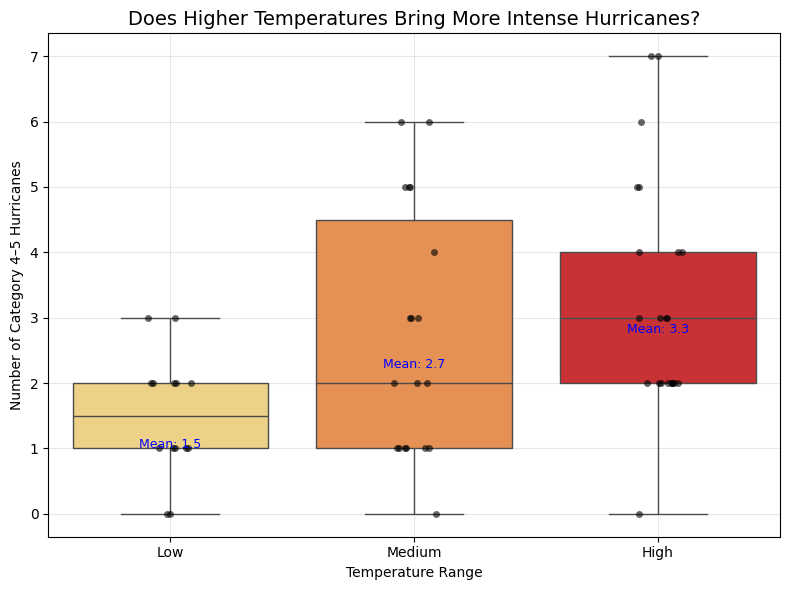

In [17]:
# Filter for Year >= 1970
recent_df = merged_df[merged_df["Year"] >= 1970].copy()

# Create temperature range bins based on No_Smoothing values
bins = [-float("inf"), 0.2, 0.6, float("inf")]
labels = ["Low", "Medium", "High"]
recent_df["Temp_Range"] = pd.cut(recent_df["No_Smoothing"], bins=bins, labels=labels)

# Plot
plt.figure(figsize=(8, 6))

# Boxplot with hue to avoid future warning
sns.boxplot(data=recent_df, x="Temp_Range", y="Major_Hurricanes", hue="Temp_Range",
            palette="YlOrRd", dodge=False, legend=False)

# Add data points
sns.stripplot(data=recent_df, x="Temp_Range", y="Major_Hurricanes",
              color="black", alpha=0.6, jitter=True)

# Calculate medians and means
medians = recent_df.groupby("Temp_Range")["Major_Hurricanes"].median()
means = recent_df.groupby("Temp_Range")["Major_Hurricanes"].mean()

# Annotate medians and means
for i, (median, mean) in enumerate(zip(medians, means)):
    plt.text(i, mean - 0.5, f"Mean: {mean:.1f}", ha='center', color='blue', fontsize=9)

plt.title("Does Higher Temperatures Bring More Intense Hurricanes?", fontsize=14)
plt.xlabel("Temperature Range")
plt.ylabel("Number of Category 4–5 Hurricanes")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### **Summary**
Across all three visualizations, no strong or consistent upward trend was observed. While there is a slight indication of increased hurricane activity at higher temperature ranges, the relationship is not definitive. This suggests that while global warming may play a role, hurricane intensity is influenced by multiple factors beyond temperature alone.

### **Conclusion**: *Does an increase in Earth's temperature correlate with greater frequency and intensity of hurricanes in the Atlantic Ocean?*

Based on the visualizations and data analysis from 1970 to 2024:

- Global Temperature Trend:
  The global temperature anomaly has risen steadily from near 0°C in 1970 to over 1.2°C by 2024, indicating significant warming.

- Hurricane Intensity Over Time:
  The number of Category 4–5 hurricanes shows variability with occasional spikes after the mid-1990s, but the pattern is inconsistent.

- Correlation Evidence:
  * The combined plot of temperature anomaly and hurricane counts shows some alignment of peaks, but the relationship is not strong.
  * The scatterplot and bubble chart demonstrate only a weak upward trend, suggesting a very weak positive correlation between temperature anomaly and hurricane intensity.
  * The boxplot across temperature ranges shows mean hurricane counts increasing from 1.5 (Low) to 3.3 (High), but the overlap between ranges indicates high variability.

Conclusion:
While hurricanes are influenced by multiple factors (such as ocean heat content, atmospheric conditions, and wind shear), this analysis suggests that any correlation between rising global temperatures and the frequency/intensity of major hurricanes in the Atlantic Ocean is weak.